In [1]:
import logging

logging.basicConfig(level=logging.DEBUG)

In [1]:
from envs.atari import Atari
from envs import wrappers

In [2]:
import matplotlib.pyplot as plt
import numpy as np

def plot_frame(obs, label=''):
    """Plot a frame without going into interactive mode"""
    # Create a new figure with non-interactive backend for this plot
    fig, ax = plt.subplots(figsize=(5, 5))
    ax.imshow(obs)
    ax.set_title(f'Observation {label}')
    ax.axis('off')
    plt.tight_layout()
    plt.show(block=True)  # Don't block, just display
    plt.close()  # Close the figure to free memory

In [212]:
from stochastic_atari import create_stochasticity_profile

game_name = 'BankHeist'

env = Atari(
            game_name,
            4,
            [64, 64],
            gray=False,
            noops=0,
            lives='unused',
            sticky=False,
            actions='needed',
            resize='opencv',
            seed=0,
        )

stochasticity_config = {
    'intrinsic_stochasticity': {
        'action_dependent': {
            'stochastic_action_prob': 0.5,
            },
        'action_independent_random': {
            'mode': '3',
            'random_stochasticity_prob': 0.1,
        },
        'action_independent_concept_drift': {
            'temporal_mode': 'cyclic', # 'sudden' or 'cyclic'
            'temporal_threshold': 5,
            'secondary_concept_type': 5,
        },
    },
    'partial_observation': {
            'type': 'blackout', # 'blackout' or 'crop' or 'ram'
            'mode': '4',
            'prob': 1,
    },
}

stochasticity_profile = create_stochasticity_profile(game_name=game_name, type=5, config=stochasticity_config)
env = stochasticity_profile.get_env(env)

In [213]:
env = wrappers.OneHotAction(env)
env = wrappers.TimeLimit(env, duration=108000)
env = wrappers.SelectAction(env, key="action")
env = wrappers.UUID(env)

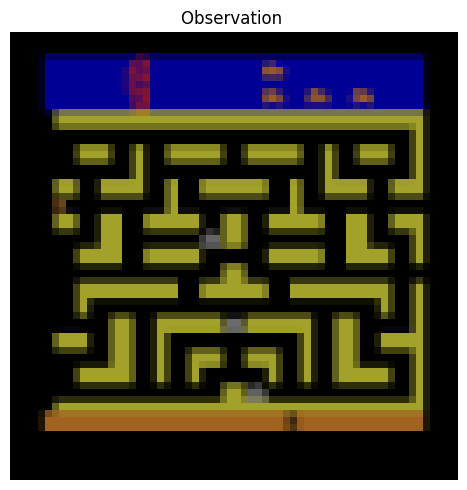

In [215]:
state = env.reset()
state.keys()
plot_frame(state['image'])

In [154]:
env.action_space

Box(0.0, 1.0, (18,), float32)

In [155]:
# SKIP AHEAD TO (238/4)TH STEP for gopher
action = np.zeros(18)
action[2] = 1.0
for i in range(238//4):
    obs, _, _, _ = env.step({'action': action})

City switch: city changed from 0 to 3
City switch: city changed from 3 to 2
City switch: city changed from 2 to 1
City switch: city changed from 1 to 2
City switch: city changed from 2 to 1
City switch: city changed from 1 to 3
City switch: city changed from 3 to 1
City switch: city changed from 1 to 3
City switch: city changed from 3 to 0
City switch: city changed from 0 to 3
City switch: city changed from 3 to 2
City switch: city changed from 2 to 0
City switch: city changed from 0 to 2
City switch: city changed from 2 to 1
City switch: city changed from 1 to 2
City switch: city changed from 2 to 0
City switch: city changed from 0 to 1
City switch: city changed from 1 to 3
City switch: city changed from 3 to 2
City switch: city changed from 2 to 3
City switch: city changed from 3 to 1
City switch: city changed from 1 to 3
City switch: city changed from 3 to 0


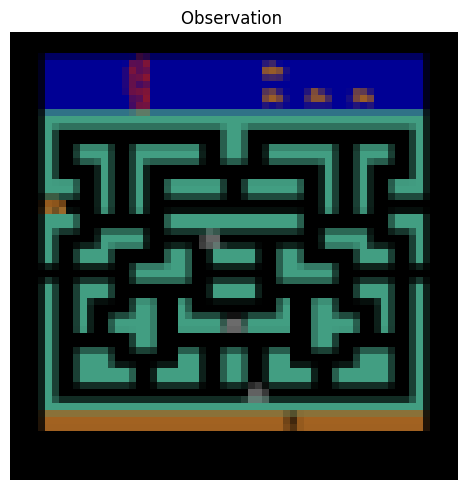

In [211]:
action = np.zeros(8)
action[1] = 1.0
state, reward, is_last, _ = env.step({'action': action})
plot_frame(state['image'])

In [163]:
# og = env.env.env.env.env._env.unwrapped.ale.getRAM()
# actions_to_hit = []
# action_space = np.asarray([[1,0,0,0], [0,1,0,0], [0,0,1,0], [0,0,0,1]])
# for i in range(1000):
#     action_id = np.random.choice(range(4))
#     print(action_id, action_space[action_id])
#     state, reward, is_last, _ = env.step({'action': action_space[action_id]})
#     actions_to_hit.append(action_space[action_id])
#     new_ram = env.env.env.env.env._env.unwrapped.ale.getRAM()
#     if not np.all(new_ram[:36] == og[:36]):
#         break
#     # else:
#     #     print("No change")
# plot_frame(state['image'])

In [ ]:
og = env.env.env.env.env._env.unwrapped.ale.getRAM()
for action in actions_to_hit:
    state, reward, is_last, _ = env.step({'action': action})
    # else:
    #     print("No change")
plot_frame(state['image'])